In [42]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

In [43]:
df = pd.read_csv('20240904_08_28_96_max_jac_dmn_as_cntry_pyasn_org_edited.csv')
df.head()

,ipv4_prefix_bgp,ipv6_prefix_bgp,jac_val_bgp,ipv4_prefix_cidr,ipv6_prefix_cidr,jac_val_cidr
0,223.29.214.0/24,2401:b8c0:d::/48,0.666667,223.29.214.160/28,2401:b8c0:d:2::/96,1.0
1,223.29.214.0/24,2401:b8c0:d::/48,0.666667,223.29.214.96/28,2401:b8c0:d:1::/96,1.0
2,92.204.55.0/24,2a00:1158::/32,0.095989,92.204.55.128/28,2a00:1158:5:48e::/96,1.0
3,92.204.55.0/24,2a00:1158::/32,0.095989,92.204.55.64/28,2a00:1158:5:44c::/96,1.0
4,92.204.55.0/24,2a00:1158::/32,0.095989,92.204.55.32/28,2a00:1158:5:427::/96,1.0


In [44]:
df_bgp_deduped = df.drop_duplicates(subset=['ipv4_prefix_bgp', 'ipv6_prefix_bgp'])
print(df_bgp_deduped.shape[0])
df_bgp_deduped.head()

46833


,ipv4_prefix_bgp,ipv6_prefix_bgp,jac_val_bgp,ipv4_prefix_cidr,ipv6_prefix_cidr,jac_val_cidr
0,223.29.214.0/24,2401:b8c0:d::/48,0.666667,223.29.214.160/28,2401:b8c0:d:2::/96,1.0
2,92.204.55.0/24,2a00:1158::/32,0.095989,92.204.55.128/28,2a00:1158:5:48e::/96,1.0
11,103.28.120.0/22,2402:f500::/32,1.000000,103.28.121.0/28,2402:f500:3:1::/96,1.0
12,103.39.132.0/24,2a01:258::/32,1.000000,103.39.132.192/28,2a01:258:f000:6::/96,1.0
13,195.68.250.0/23,2a00:18a8::/32,0.230769,195.68.250.96/28,2a00:18a8:0:104::/96,1.0


In [ ]:
start_date = dt.datetime(2023, 9, 13)
end_date = dt.datetime(2024, 9, 11)

start_ts = int(start_date.timestamp())
end_ts = int(end_date.timestamp())

# Assign random Unix timestamps to each row
df_bgp_deduped['timestamp'] = np.random.randint(start_ts, end_ts + 1, size=len(df_bgp_deduped))

df_bgp_deduped.head()

/var/folders/k_/cb1kc6pn1ddd1d7v_81yp_v00000gn/T/ipykernel_14878/1606079744.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bgp_deduped['timestamp'] = np.random.randint(start_ts, end_ts + 1, size=len(df_bgp_deduped))


,ipv4_prefix_bgp,ipv6_prefix_bgp,jac_val_bgp,ipv4_prefix_cidr,ipv6_prefix_cidr,jac_val_cidr,timestamp
0,223.29.214.0/24,2401:b8c0:d::/48,0.666667,223.29.214.160/28,2401:b8c0:d:2::/96,1.0,1714278234
2,92.204.55.0/24,2a00:1158::/32,0.095989,92.204.55.128/28,2a00:1158:5:48e::/96,1.0,1719031927
11,103.28.120.0/22,2402:f500::/32,1.000000,103.28.121.0/28,2402:f500:3:1::/96,1.0,1694882315
12,103.39.132.0/24,2a01:258::/32,1.000000,103.39.132.192/28,2a01:258:f000:6::/96,1.0,1698332588
13,195.68.250.0/23,2a00:18a8::/32,0.230769,195.68.250.96/28,2a00:18a8:0:104::/96,1.0,1698110975


In [46]:
df_bgp_deduped.to_json('sibling_prefixes_data.json', orient='records', indent=4)
print("Data exported to sibling_prefixes_data.json")

Data exported to sibling_prefixes_data.json


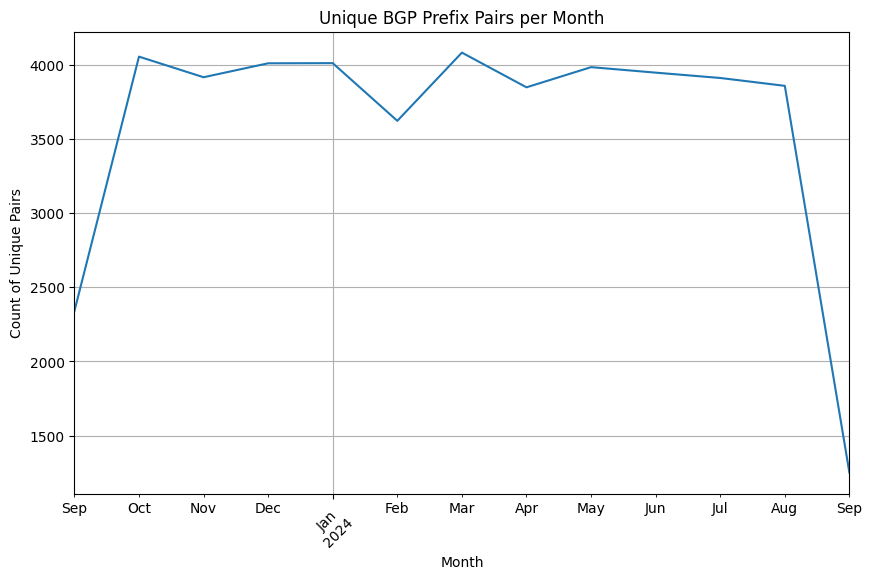

In [ ]:
df_chart1 = df_bgp_deduped.copy()
df_chart1['date'] = pd.to_datetime(df_bgp_deduped['timestamp'], unit='s')

df_chart1['month'] = df_chart1['date'].dt.to_period('M')

monthly_counts = df_chart1.groupby('month').size()

monthly_counts.plot(kind='line', figsize=(10, 6))
plt.title('Unique BGP Prefix Pairs per Month')
plt.xlabel('Month')
plt.ylabel('Count of Unique Pairs')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

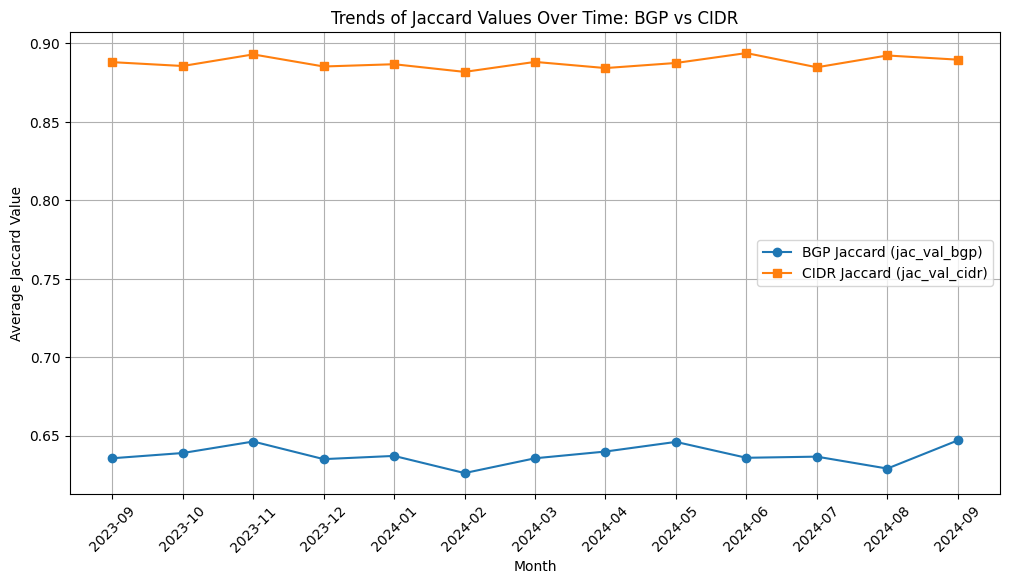

In [ ]:
monthly_jac_bgp = df_chart1.groupby('month')['jac_val_bgp'].mean()
monthly_jac_cidr = df_chart1.groupby('month')['jac_val_cidr'].mean()

plt.figure(figsize=(12, 6))
plt.plot(monthly_jac_bgp.index.astype(str), monthly_jac_bgp.values, label='BGP Jaccard (jac_val_bgp)', marker='o')
plt.plot(monthly_jac_cidr.index.astype(str), monthly_jac_cidr.values, label='CIDR Jaccard (jac_val_cidr)', marker='s')
plt.title('Trends of Jaccard Values Over Time: BGP vs CIDR')
plt.xlabel('Month')
plt.ylabel('Average Jaccard Value')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

In [49]:
print(monthly_jac_bgp.head())
print(monthly_jac_cidr.head())

month
2023-09    0.635637
2023-10    0.638977
2023-11    0.646300
2023-12    0.635081
2024-01    0.637130
Freq: M, Name: jac_val_bgp, dtype: float64
month
2023-09    0.888011
2023-10    0.885569
2023-11    0.892950
2023-12    0.885252
2024-01    0.886698
Freq: M, Name: jac_val_cidr, dtype: float64
